In [1]:
# import os
# os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [2]:
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### Vanishing/Exploding Gradients Problem


In [3]:
def logit(z):
    return 1 / (1+np.exp(-z))

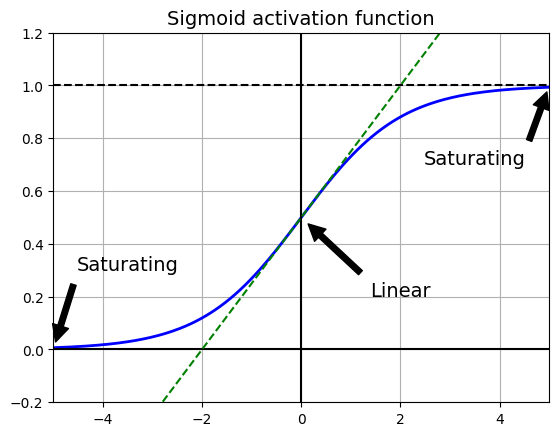

In [4]:
z = np.linspace(-5, 5, 200)


plt.plot(z, logit(z), "b-", linewidth=2)
plt.plot([-5,5],[1,1],'k--')
plt.plot([-5,5],[0,0],'k-')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.title("Sigmoid activation function", fontsize=14)
plt.grid(True)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

### Xavier and He Initialization


In [5]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'IdentityInitializer',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'OrthogonalInitializer',
 'RandomNormal',
 'RandomUniform',
 'STFT',
 'STFTInitializer',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'stft',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [6]:
keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal')

<Dense name=dense, built=False>

In [7]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                           distribution='uniform')
keras.layers.Dense(10, activation='relu', kernel_initializer=init)

<Dense name=dense_1, built=False>

### Nonsaturating Activation Functions


In [8]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

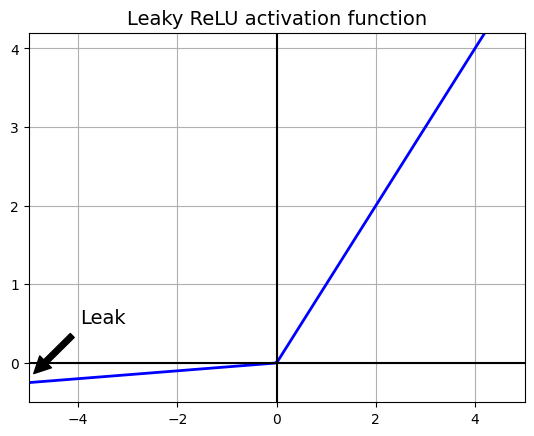

In [9]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.plot([5, -5], [0, 0], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

In [10]:
[m for m in dir(keras.activations) if not "relu" in m.lower()]

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'celu',
 'deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'glu',
 'hard_shrink',
 'hard_sigmoid',
 'hard_silu',
 'hard_swish',
 'hard_tanh',
 'linear',
 'log_sigmoid',
 'log_softmax',
 'mish',
 'selu',
 'serialize',
 'sigmoid',
 'silu',
 'soft_shrink',
 'softmax',
 'softplus',
 'softsign',
 'sparse_plus',
 'sparsemax',
 'squareplus',
 'swish',
 'tanh',
 'tanh_shrink',
 'threshold']

In [11]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [12]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [15]:
history_ = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.4623 - loss: 1.6937 - val_accuracy: 0.7120 - val_loss: 0.9062
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.7143 - loss: 0.8604 - val_accuracy: 0.7668 - val_loss: 0.7244
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7639 - loss: 0.7141 - val_accuracy: 0.7920 - val_loss: 0.6453
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7873 - loss: 0.6435 - val_accuracy: 0.8042 - val_loss: 0.5986
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8000 - loss: 0.5997 - val_accuracy: 0.8142 - val_loss: 0.5670
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8094 - loss: 0.5692 - val_accuracy: 0.8246 - val_loss: 0.5439
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8150 - loss: 0.5464 - val_accuracy: 0.8322 - val_loss: 0.5262
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8210 - loss: 0.5

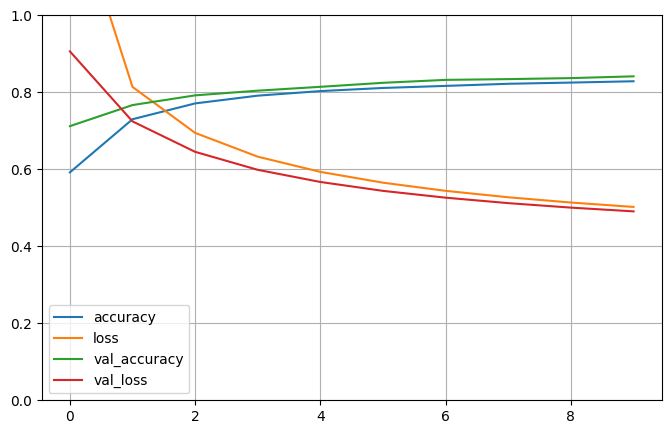

In [16]:
import pandas as pd

pd.DataFrame(history_.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### PReLU:

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [19]:
history_ = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4473 - loss: 1.7470 - val_accuracy: 0.7262 - val_loss: 0.9028
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7384 - loss: 0.8496 - val_accuracy: 0.7724 - val_loss: 0.7126
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7751 - loss: 0.6979 - val_accuracy: 0.7930 - val_loss: 0.6330
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7953 - loss: 0.6273 - val_accuracy: 0.8066 - val_loss: 0.5853
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8068 - loss: 0.5833 - val_accuracy: 0.8174 - val_loss: 0.5529
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8147 - loss: 0.5531 - val_accuracy: 0.8272 - val_loss: 0.5295
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8215 - loss: 0.5307 - val_accuracy: 0.8310 - val_loss: 0.5117
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8260 - loss: 0.51

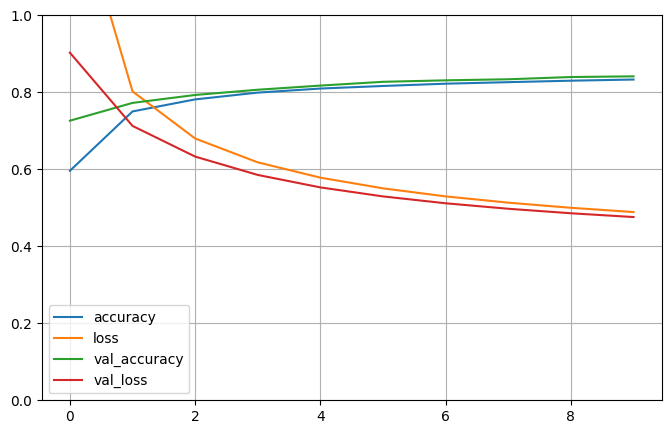

In [20]:
import pandas as pd

pd.DataFrame(history_.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### ELU

In [21]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

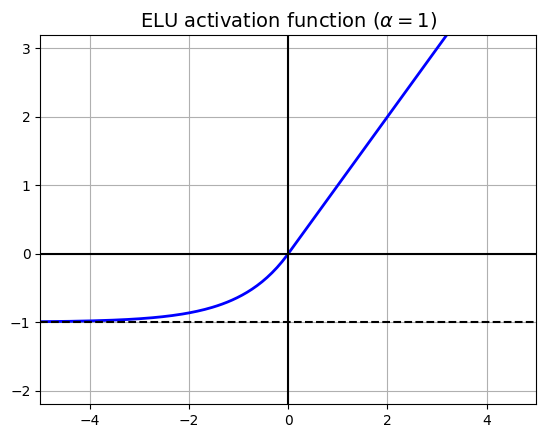

In [22]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [23]:
keras.layers.Dense(10, activation="elu")

<Dense name=dense_8, built=False>

### SELU

In [24]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [25]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

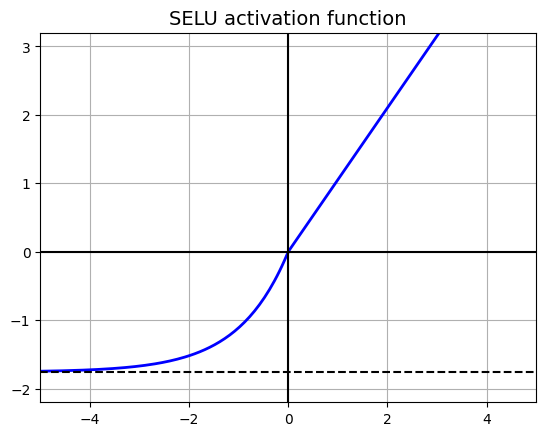

In [26]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [27]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [28]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

<Dense name=dense_9, built=False>

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [31]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [32]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - accuracy: 0.4592 - loss: 1.4035 - val_accuracy: 0.7202 - val_loss: 0.7764
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.7435 - loss: 0.7135 - val_accuracy: 0.7842 - val_loss: 0.6094
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.7862 - loss: 0.6058 - val_accuracy: 0.7812 - val_loss: 0.6832
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.8015 - loss: 0.5756 - val_accuracy: 0.7902 - val_loss: 0.6281
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 44s 19ms/step - accuracy: 0.8128 - loss: 0.5377 - val_accuracy: 0.8274 - val_loss: 0.5075


In [33]:
np.random.seed(42)
tf.random.set_seed(42)

In [34]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [36]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - accuracy: 0.1906 - loss: 2.0697 - val_accuracy: 0.4384 - val_loss: 1.3169
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.4328 - loss: 1.3484 - val_accuracy: 0.6422 - val_loss: 0.8912
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.5977 - loss: 1.0100 - val_accuracy: 0.6496 - val_loss: 0.8826
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.6419 - loss: 0.8932 - val_accuracy: 0.5954 - val_loss: 1.0064
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.6909 - loss: 0.7638 - val_accuracy: 0.6938 - val_loss: 0.7481


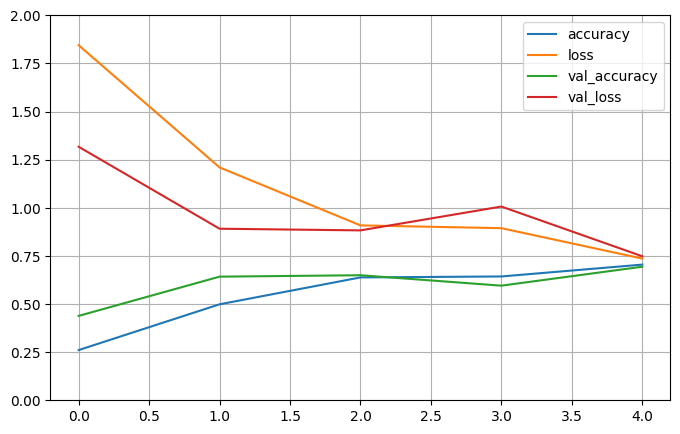

In [37]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [38]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_212 (Dense)                    │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 300)                 │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_213 (Dense)                    │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_214 (Dense)                    │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [40]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [41]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [42]:
history_ = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6152 - loss: 1.1699 - val_accuracy: 0.8064 - val_loss: 0.5699
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7987 - loss: 0.5967 - val_accuracy: 0.8310 - val_loss: 0.4901
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8223 - loss: 0.5220 - val_accuracy: 0.8458 - val_loss: 0.4528
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8354 - loss: 0.4823 - val_accuracy: 0.8522 - val_loss: 0.4305
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8443 - loss: 0.4556 - val_accuracy: 0.8562 - val_loss: 0.4153
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8511 - loss: 0.4354 - val_accuracy: 0.8616 - val_loss: 0.4040
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8570 - loss: 0.4190 - val_accuracy: 0.8626 - val_loss: 0.3952
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8616 - loss: 0

In [43]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [44]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [45]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5655 - loss: 1.3579 - val_accuracy: 0.7926 - val_loss: 0.6699
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7741 - loss: 0.7114 - val_accuracy: 0.8246 - val_loss: 0.5494
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8025 - loss: 0.6063 - val_accuracy: 0.8378 - val_loss: 0.4944
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8168 - loss: 0.5516 - val_accuracy: 0.8458 - val_loss: 0.4619
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8266 - loss: 0.5163 - val_accuracy: 0.8538 - val_loss: 0.4401
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8341 - loss: 0.4908 - val_accuracy: 0.8564 - val_loss: 0.4242
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8414 - loss: 0.4709 - val_accuracy: 0.8594 - val_loss: 0.4120
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8465 - loss: 0.

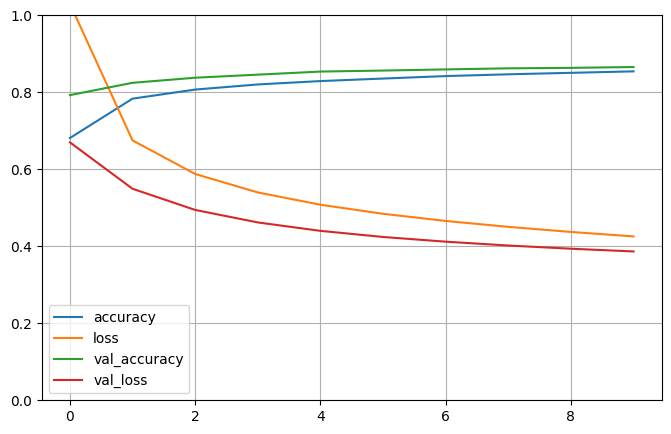

In [46]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Gradient Clipping


In [46]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [47]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

### Reusing Pretrained Layers


  X_train_A: all images of all items except for sandals and shirts (classes 5 and 6).

 X_train_B: a much smaller training set of just the first 200 images of sandals or shirts.



In [63]:
def split_dataset(X, y):
    y_6_or_5 = (y==5) | (y==6)
    y_A = y[~y_6_or_5]
    y_A[y_A > 6] -= 2
    y_B = (y[y_6_or_5] == 6).astype(np.float32)
    return ((X[~y_6_or_5], y_A),
            (X[y_6_or_5], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [64]:
X_train_A.shape

(43986, 28, 28)

In [65]:
X_train_B.shape

(200, 28, 28)

In [66]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [67]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [75]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28,28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden,activation="selu"))
model_A.add(keras.layers.Dense(8,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [76]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [77]:
history_ = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6889 - loss: 0.9097 - val_accuracy: 0.8645 - val_loss: 0.3992
Epoch 2/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8683 - loss: 0.3801 - val_accuracy: 0.8807 - val_loss: 0.3396
Epoch 3/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8841 - loss: 0.3310 - val_accuracy: 0.8886 - val_loss: 0.3142
Epoch 4/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8919 - loss: 0.3076 - val_accuracy: 0.8946 - val_loss: 0.2993
Epoch 5/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8967 - loss: 0.2925 - val_accuracy: 0.8991 - val_loss: 0.2881
Epoch 6/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9021 - loss: 0.2813 - val_accuracy: 0.9026 - val_loss: 0.2801
Epoch 7/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9059 - loss: 0.2724 - val_accuracy: 0.9046 - val_loss: 0.2739
Epoch 8/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9094 - loss: 0.2651 

In [78]:
model_A.save("my_model_A.h5")

In [80]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28,28]))
for n_hidden in (300, 100, 50, 50 ,50):
    model_B.add(keras.layers.Dense(n_hidden,activation="selu"))
model_B.add(keras.layers.Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [81]:
model_B.compile(loss="binary_crossentropy",optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=["accuracy"])

In [83]:
history_ = model_B.fit(X_train_B,y_train_B,epochs=20,
                       validation_data=(X_valid_B,y_valid_B))

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6201 - loss: 0.6863 - val_accuracy: 0.8296 - val_loss: 0.3863
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8489 - loss: 0.3680 - val_accuracy: 0.8915 - val_loss: 0.2977
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8981 - loss: 0.2763 - val_accuracy: 0.9189 - val_loss: 0.2428
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9454 - loss: 0.2186 - val_accuracy: 0.9351 - val_loss: 0.2068
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9454 - loss: 0.1803 - val_accuracy: 0.9422 - val_loss: 0.1816
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9563 - loss: 0.1532 - val_accuracy: 0.9523 - val_loss: 0.1631
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9632 - loss: 0.1331 - val_accuracy: 0.9594 - val_loss: 0.1490
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9770 - loss: 0.1177 - val_accuracy: 0.9594 - val_loss: 0.1378


In [84]:
model_B.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_236 (Dense)                    │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_237 (Dense)                    │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_238 (Dense)                    │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_239 (Dense)                    │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_240 (Dense)                    │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_241 (Dense)                    │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 275,803 (1.05 MB)

 Trainable params: 275,801 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [90]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1,activation="sigmoid"))

In [92]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1,activation="sigmoid"))

In [107]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-4),
                     metrics=["accuracy"])

In [108]:
history_ = model_B_on_A.fit(X_train_B,y_train_B, epochs=16,
                            validation_data=(X_valid_B,y_valid_B))

Epoch 1/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9779 - loss: 0.1056 - val_accuracy: 0.9635 - val_loss: 0.1298
Epoch 2/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9779 - loss: 0.1055 - val_accuracy: 0.9635 - val_loss: 0.1296
Epoch 3/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9779 - loss: 0.1054 - val_accuracy: 0.9635 - val_loss: 0.1295
Epoch 4/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9779 - loss: 0.1052 - val_accuracy: 0.9635 - val_loss: 0.1293
Epoch 5/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9779 - loss: 0.1051 - val_accuracy: 0.9635 - val_loss: 0.1292
Epoch 6/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9779 - loss: 0.1050 - val_accuracy: 0.9635 - val_loss: 0.1291
Epoch 7/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9779 - loss: 0.1048 - val_accuracy: 0.9635 - val_loss: 0.1289
Epoch 8/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9779 - loss: 0.1047 - val_accuracy: 0.9635 - val_loss: 0.1288


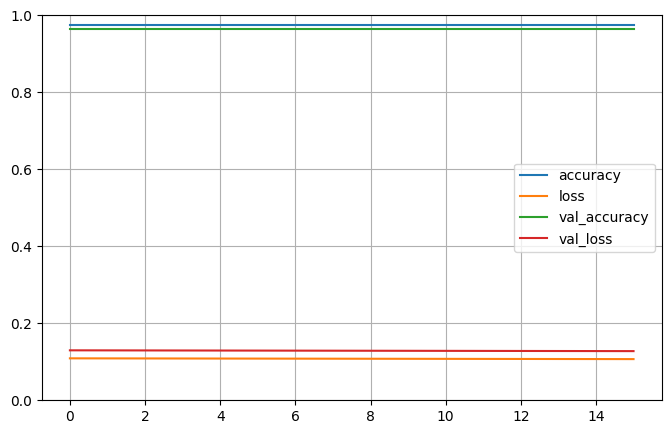

In [109]:
pd.DataFrame(history_.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [110]:
model_B.evaluate(X_test_B, y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9856 - loss: 0.0739


[0.07521407306194305, 0.9835000038146973]

In [111]:
model_B_on_A.evaluate(X_test_B,y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9719 - loss: 0.1241


[0.12131344527006149, 0.9739999771118164]

### Faster Optimizers

#### Momentum optimization


In [113]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

#### Nesterov Accelerated Gradient


In [114]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

#### AdaGrad

In [115]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

#### Adam Optimization


In [116]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

#### Adamax Optimization


In [117]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

#### Nadam Optimization


In [118]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

## Learning Rate Scheduling


#### Power Scheduling


In [121]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.95
)

optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

In [126]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [127]:
n_epochs = 25
history_ = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7893 - loss: 0.6099 - val_accuracy: 0.8616 - val_loss: 0.4099
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8645 - loss: 0.3869 - val_accuracy: 0.8706 - val_loss: 0.3796
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8759 - loss: 0.3500 - val_accuracy: 0.8764 - val_loss: 0.3647
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8836 - loss: 0.3267 - val_accuracy: 0.8796 - val_loss: 0.3553
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8898 - loss: 0.3094 - val_accuracy: 0.8824 - val_loss: 0.3490
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8966 - loss: 0.2956 - val_accuracy: 0.8832 - val_loss: 0.3439
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9011 - loss: 0.2841 - val_accuracy: 0.8850 - val_loss: 0.3401
Epoch 8/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9041 - loss: 0

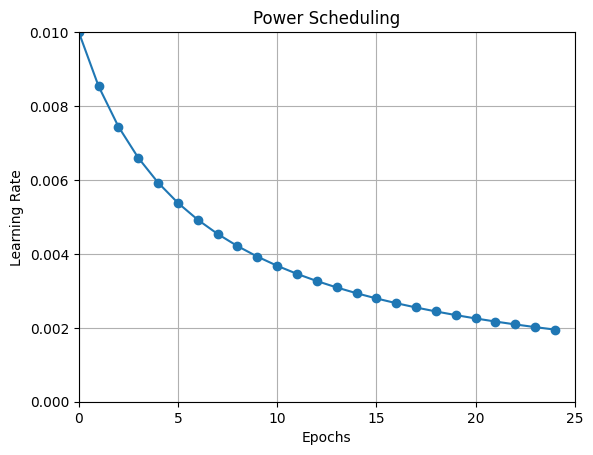

In [137]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,"o-")
plt.axis([0,n_epochs,0, 0.01])
plt.title("Power Scheduling")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.show()

#### Exponential Scheduling

In [138]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [139]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [140]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [141]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7532 - loss: 1.0044 - val_accuracy: 0.8022 - val_loss: 0.7460 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8075 - loss: 0.6276 - val_accuracy: 0.7962 - val_loss: 0.7067 - learning_rate: 0.0089
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8079 - loss: 0.6392 - val_accuracy: 0.8274 - val_loss: 0.6511 - learning_rate: 0.0079
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8277 - loss: 0.5689 - val_accuracy: 0.8274 - val_loss: 0.5585 - learning_rate: 0.0071
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8374 - loss: 0.5223 - val_accuracy: 0.8496 - val_loss: 0.5383 - learning_rate: 0.0063
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8514 - loss: 0.4757 - val_accuracy: 0.8592 - val_loss: 0.5554 - learning_rate: 0.0056
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accurac

In [143]:
history.history

{'accuracy': [0.7752727270126343,
  0.805290937423706,
  0.8152545690536499,
  0.8273817896842957,
  0.8407999873161316,
  0.8519091010093689,
  0.8651818037033081,
  0.8734181523323059,
  0.8821272850036621,
  0.8913272619247437,
  0.8969454765319824,
  0.9044908881187439,
  0.9114181995391846,
  0.9174000024795532,
  0.9227454662322998,
  0.9280909299850464,
  0.9327272772789001,
  0.9365272521972656,
  0.9414363503456116,
  0.9446545243263245,
  0.9478726983070374,
  0.9507636427879333,
  0.9538545608520508,
  0.9563090801239014,
  0.9589090943336487],
 'loss': [0.7658786177635193,
  0.6455546021461487,
  0.6187391877174377,
  0.5643951892852783,
  0.5144515633583069,
  0.4814078211784363,
  0.42434489727020264,
  0.39234864711761475,
  0.36473628878593445,
  0.33767372369766235,
  0.32081377506256104,
  0.2882939875125885,
  0.2720026969909668,
  0.2502805292606354,
  0.23341500759124756,
  0.21948835253715515,
  0.20349232852458954,
  0.19179797172546387,
  0.1792861819267273,
  0

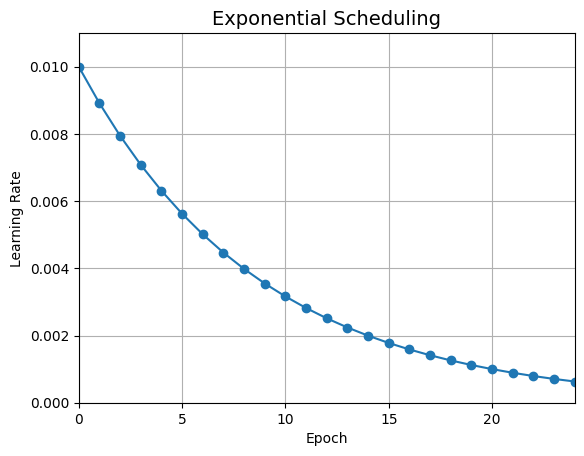

In [144]:
plt.plot(history.epoch, history.history["learning_rate"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

#### Performance Scheduling


In [148]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7761 - loss: 0.7300 - val_accuracy: 0.8458 - val_loss: 0.4961 - learning_rate: 0.0200
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8363 - loss: 0.5069 - val_accuracy: 0.8582 - val_loss: 0.4813 - learning_rate: 0.0200
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8467 - loss: 0.4977 - val_accuracy: 0.8364 - val_loss: 0.6914 - learning_rate: 0.0200
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8443 - loss: 0.5179 - val_accuracy: 0.8432 - val_loss: 0.6749 - learning_rate: 0.0200
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8483 - loss: 0.5394 - val_accuracy: 0.8522 - val_loss: 0.5806 - learning_rate: 0.0200
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8439 - loss: 0.5624 - val_accuracy: 0.8530 - val_loss: 0.6487 - learning_rate: 0.0200
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8

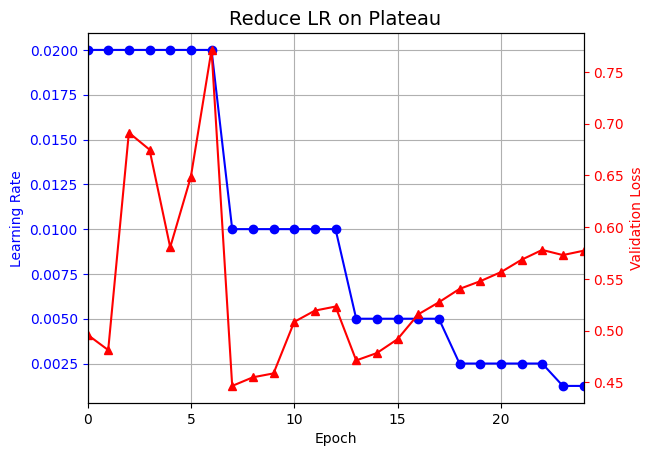

In [150]:
plt.plot(history.epoch, history.history["learning_rate"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

### Avoiding Overfitting Through Regularization


In [151]:
layer = keras.layers.Dense(100, activation='elu',
                           kernel_initializer='he_normal',
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [152]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [153]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history_ = model.fit(X_train_scaled,y_train,epochs=n_epochs,
                     validation_data=(X_valid_scaled,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.7977 - loss: 3.2284 - val_accuracy: 0.8392 - val_loss: 0.7057
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8223 - loss: 0.7290 - val_accuracy: 0.8416 - val_loss: 0.6876


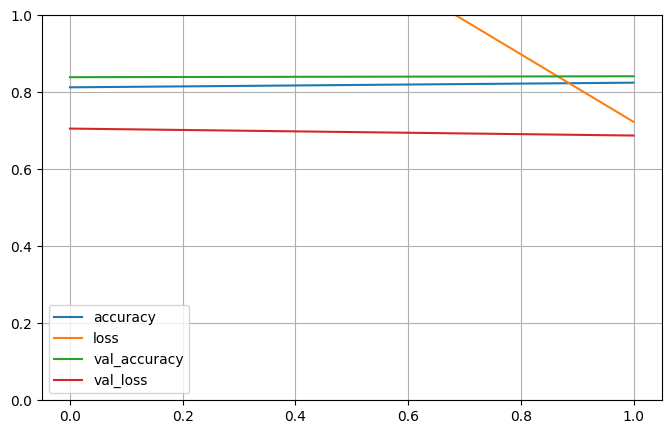

In [156]:
pd.DataFrame(history_.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [154]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.7978 - loss: 3.2452 - val_accuracy: 0.8358 - val_loss: 0.7071
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8209 - loss: 0.7333 - val_accuracy: 0.8416 - val_loss: 0.6897


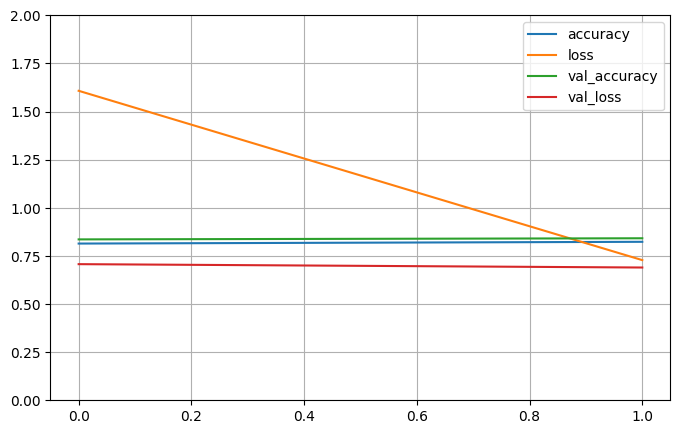

In [157]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

### Dropout

In [160]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
    ])

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs=2

history_ = model.fit(X_train_scaled,y_train, epochs=n_epochs,
                     validation_data=(X_valid_scaled,y_valid))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7605 - loss: 0.7229 - val_accuracy: 0.8666 - val_loss: 0.3612
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8412 - loss: 0.4260 - val_accuracy: 0.8708 - val_loss: 0.3564


### Alpha Dropout


In [161]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7161 - loss: 0.8020 - val_accuracy: 0.8490 - val_loss: 0.5676
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7911 - loss: 0.5630 - val_accuracy: 0.8474 - val_loss: 0.5416
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8012 - loss: 0.5352 - val_accuracy: 0.8570 - val_loss: 0.5063
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8112 - loss: 0.5131 - val_accuracy: 0.8616 - val_loss: 0.4901
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8135 - loss: 0.4982 - val_accuracy: 0.8596 - val_loss: 0.4566
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8212 - loss: 0.4821 - val_accuracy: 0.8646 - val_loss: 0.4730
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8247 - loss: 0.4712 - val_accuracy: 0.8696 - val_loss: 0.4382
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8283 - loss: 0.46

In [162]:
model.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8659 - loss: 0.4681


[0.47154873609542847, 0.8658000230789185]

In [163]:
model.evaluate(X_train_scaled, y_train)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8820 - loss: 0.3521


[0.3565315902233124, 0.8841999769210815]

### MC Dropout


In [164]:
tf.random.set_seed(42)
np.random.seed(42)

In [167]:
y_probas = np.stack([model(X_test_scaled, training=True)
                    for sample in range(100)])

y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [168]:
np.round(model.predict(X_test_scaled[:1]), 2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [176]:
np.round(y_probas[:,:1],2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.06, 0.  , 0.92]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.66, 0.  , 0.21]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.3 , 0.  , 0.69]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.01, 0.  , 0.93]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.02, 0.  , 0.96]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.31, 0.  , 0.67]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.65, 0.  , 0.2 , 0.  , 0.15]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.08, 0.  , 0.9 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.07, 0.  , 0.9 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.05, 0.  , 0.94]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.39, 0.  , 0.44]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.15, 0.  , 0

In [177]:
np.round(y_proba[:1],2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.15, 0.  , 0.75]],
      dtype=float32)

In [178]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.18, 0.  , 0.25]],
      dtype=float32)

In [179]:
y_pred = np.argmax(y_proba, axis=1)

In [180]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8648